In [260]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [238]:
df = pd.read_csv('./adult.csv')
# Check for Null Data
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [239]:
# Replace All Null Data in NaN
df = df.fillna(np.nan)

In [240]:
# Check the data
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [241]:
# Reformat Column We Are Predicting
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [242]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

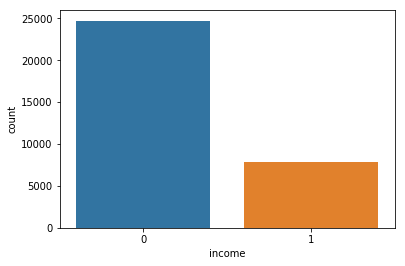

In [243]:
# Count of >50K & <=50K
sns.countplot(df['income'],label="Count")


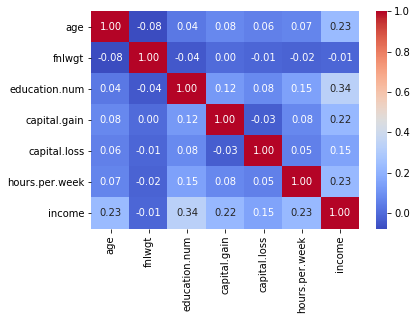

In [244]:
# Correlation matrix between numerical values
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [245]:
# Fill missing value with mode
df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])
# Fill '?' with cat_features mode
df[cat_features] = df[cat_features].replace("?", (df[cat_features].mode().iloc[0])) 

In [246]:
# Check for Null Data
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [247]:
df[cat_features].head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


In [248]:
# fill the missing values with mean for numerical attributes
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

/Users/chinmay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/chinmay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/chinmay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


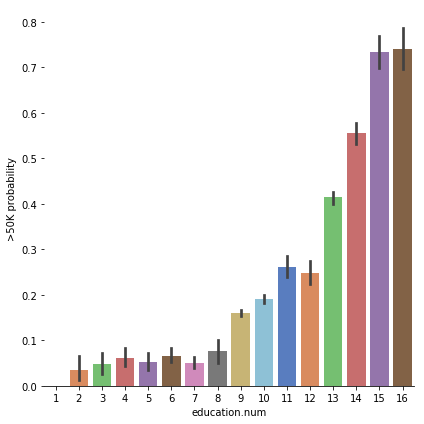

In [249]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

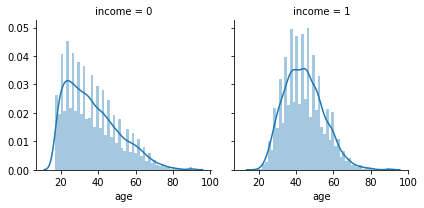

In [250]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")

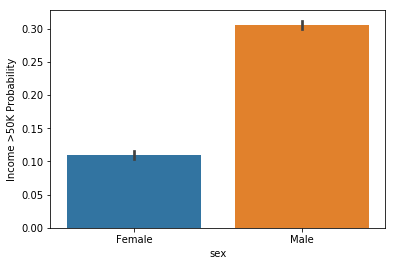

In [251]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")

In [252]:
# Convert Sex value to 0 and 1
df["sex"] = df["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
df["marital.status"] = df["marital.status"].map({"Married":1, "Single":0})
df["marital.status"] = df["marital.status"].astype(int)

In [253]:
# Drop the data you don't want to use
df.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
df.head()

Dataset with Dropped Labels


,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,0
1,82,132870,9,0,1,0,4356,18,0
2,66,186061,10,0,1,0,4356,40,0
3,54,140359,4,0,1,0,3900,40,0
4,41,264663,10,0,1,0,3900,40,0


In [254]:

# X = all columns except the Income column
X = df.drop(['income'], axis=1)
# Y =  Income column
Y = df['income']

In [255]:
# split data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
    test_size=0.2,random_state=1)

In [256]:
# Create model and fit training data
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [261]:
# Predict Y based on test data
Y_pred = model.predict(X_test)
# Check accuracy
accuracy_score(Y_test, Y_pred)

0.797328420082911

In [262]:
# Plot confusion matrix for GaussianNB
confusion_matrix(Y_test, Y_pred)

array([[4698,  245],
       [1075,  495]])

In [258]:
modelMultinomial = MultinomialNB()
modelMultinomial.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [259]:
# Predict Y based on test data
Y_pred_multinomial = modelMultinomial.predict(X_test)
# Check accuracy
accuracy_score(Y_test, Y_pred_multinomial)

0.783049286043298

In [263]:
# Plot confusion matrix for MultinomialNB
confusion_matrix(Y_test, Y_pred_multinomial)

array([[4723,  220],
       [1193,  377]])